In [20]:
import librosa
import numpy as np
import pandas as pd

## Aufgabe 1: Fourier-Approximation in numpy

### (a) Implementierung der k-ten Fourier-Komponente
Implementieren Sie mit numpy eine Methode zur Berechnung der k-ten Fourier-Komponente einer Funktion, gegeben durch arrays `x` und `y`, mithilfe der Trapezregel (`np.trapz`).

In [21]:
from FA import Fourier_Approximation_numpy as FA_numpy

In [22]:
x_values = np.linspace(0, 2 , 100)
y_values = np.sin(x_values)
k_index = 1

In [23]:
component = FA_numpy.compute_fourier_component(x_values, y_values, k_index)
print(component)

(-0.15971108194513575+0.3219738093106199j)


### (b) Fourier-Approximation
Implementieren Sie mit numpy eine Methode zur Berechnung der Fourier-Approximation `fapp` mit einer gegebenen Anzahl (2m + 1) von Fourier-Komponenten.

In [24]:
m_value = 3
fapp = FA_numpy.fourier_approximation(x_values, y_values, m_value)
print(fapp)

[0.99062751 0.87723955 0.76955893 0.66952775 0.57891021 0.49924425
 0.43180017 0.37754768 0.33713223 0.31086153 0.29870248 0.30028866
 0.3149379  0.34167948 0.37928966 0.4263346  0.48121895 0.54223844
 0.60763479 0.67565092 0.74458475 0.81283961 0.87896984 0.94171995
 1.00005618 1.05318952 1.10058957 1.14198897 1.17737835 1.20699237
 1.23128729 1.25091133 1.26666887 1.27948001 1.29033707 1.30025968
 1.31025027 1.32125148 1.33410724 1.34952874 1.36806673 1.39009093
 1.41577739 1.44510398 1.47785432 1.51362967 1.55186833 1.59187168
 1.63283571 1.67388678 1.71412017 1.7526397  1.78859704 1.82122886
 1.84989054 1.87408491 1.8934849  1.90794914 1.91752986 1.92247267
 1.92320812 1.92033551 1.91459914 1.90685828 1.89805161 1.88915765
 1.88115271 1.87496783 1.87144644 1.87130454 1.8750947  1.88317562
 1.89568843 1.91254067 1.93339887 1.95769015 1.98461288 2.01315633
 2.04212875 2.07019297 2.09590846 2.1177785  2.13430077 2.14401974
 2.14557904 2.13777196 2.1195882  2.09025541 2.04927376 1.9964

### (c) Näherung der Funktion f1(x)
Nähern Sie die Funktion \( f_1(x) = \frac{1}{e^x + e^{-x}} \) auf dem Intervall \([-3, 3]\) (Auflösung: N = 600 Schritte) mit verschiedenen Anzahlen von Komponenten (2m + 1). Plotten Sie den Vergleich zur Originalfunktion `f`.

In [25]:
x_values = np.linspace(-3, 3, 600)
y_values_f1 = FA_numpy.f1(x_values)
m_values = [1, 3, 5, 10]

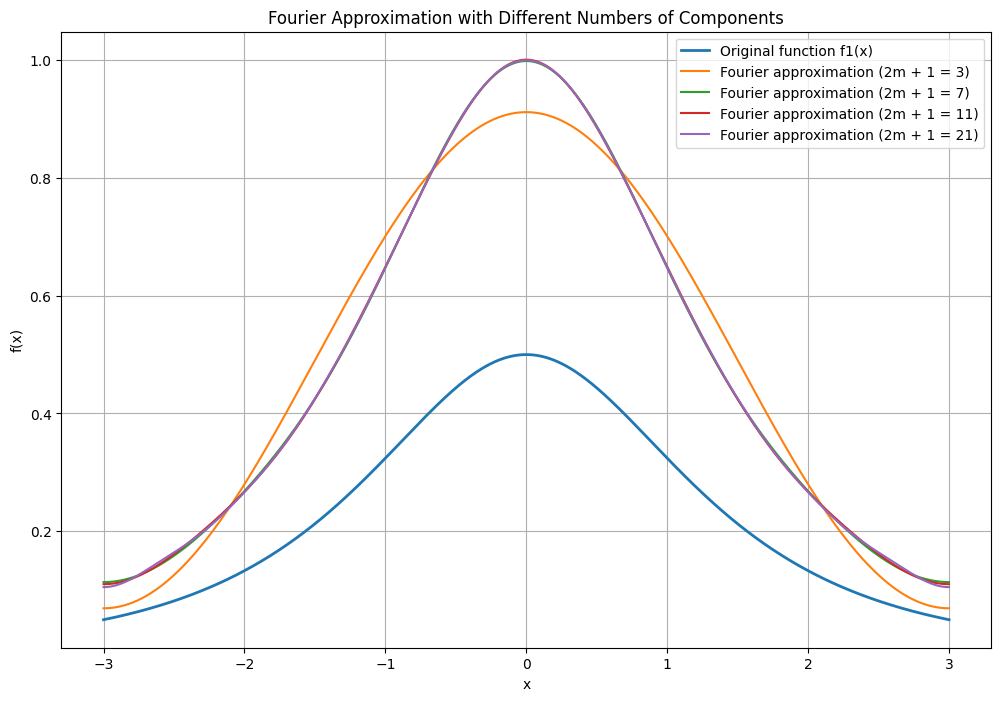

In [26]:
FA_numpy.plot_fourier_approximations(x_values, y_values_f1, m_values, 'f1(x)')

### (d) Bestimmung der Anzahl der Fourier-Komponenten
Bestimmen Sie die Anzahl der Fourier-Komponenten, die benötigt werden, um eine Approximation mit höchstens 0,1% relativen Fehler zu erhalten.

M_Value: 1, Relative Error: 1.3074588316532159
M_Value: 2, Relative Error: 1.712431344288959
Relative error increased at m = 2. Stopping early.


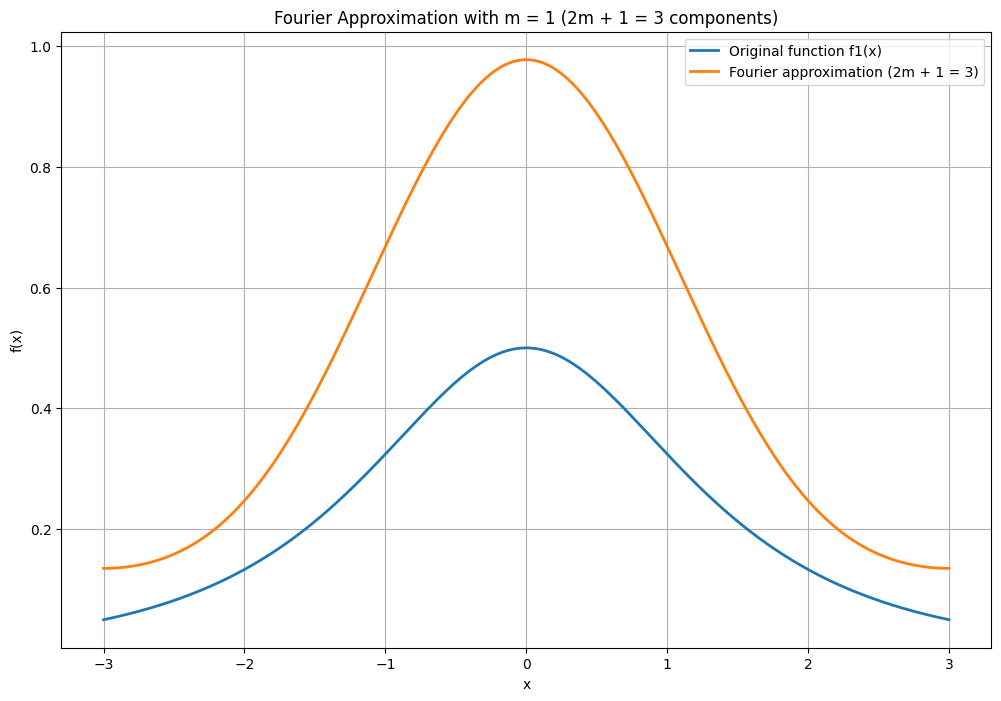

Optimal m_value for f1(x): 1


In [27]:
tolerance = 1
m_value_f1 = FA_numpy.find_fourier_components_for_error_tolerance(x_values, y_values_f1, tolerance, 'f1(x)')
print("Optimal m_value for f1(x):", m_value_f1)

### (e) Näherung weiterer Funktionen
Versuchen Sie die Funktionen \( f_2(x) = e^x \) und \( f_3(x) = e^{|x|} \) auf dem Intervall \([-3, 3]\) (Auflösung: N = 600 Schritte) mit einem 0,1%igen Approximationsfehler anzunähern. Beschreiben und erklären Sie die Unterschiede.

M_Value: 1, Relative Error: 261.1072595000662
M_Value: 2, Relative Error: 310.91667219604125
Relative error increased at m = 2. Stopping early.


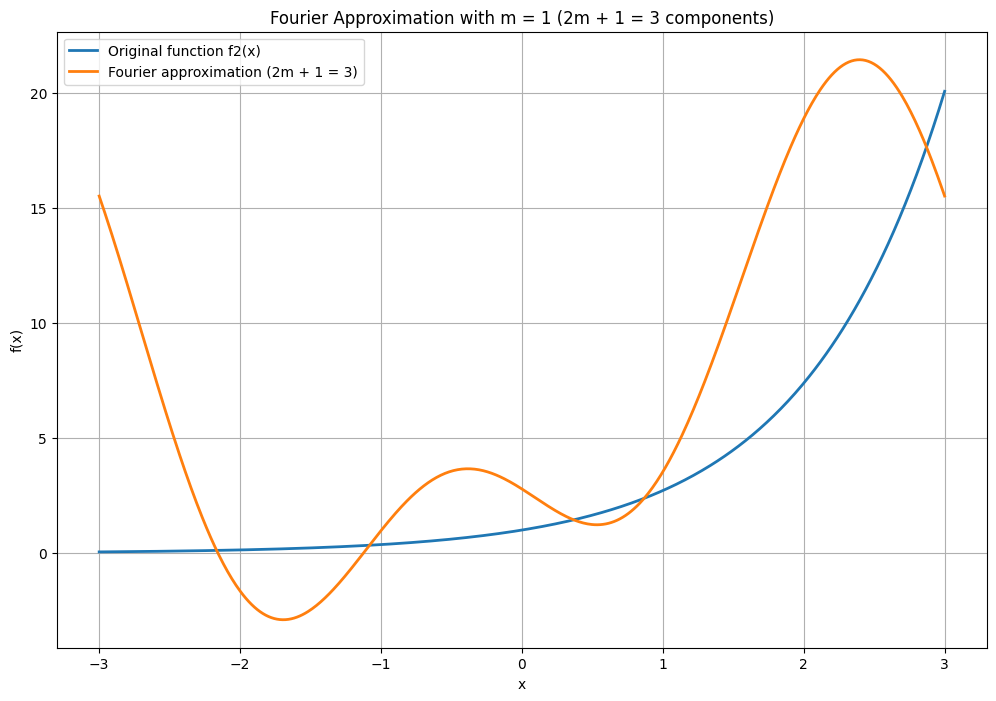

Optimal m_value for f2(x): 1


In [28]:
y_values_f2 = FA_numpy.f2(x_values)
m_value_f2 = FA_numpy.find_fourier_components_for_error_tolerance(x_values, y_values_f2, tolerance, 'f2(x)')
print("Optimal m_value for f2(x):", m_value_f2)

M_Value: 1, Relative Error: 1.8520455745589306
M_Value: 2, Relative Error: 3.0186537813224885
Relative error increased at m = 2. Stopping early.


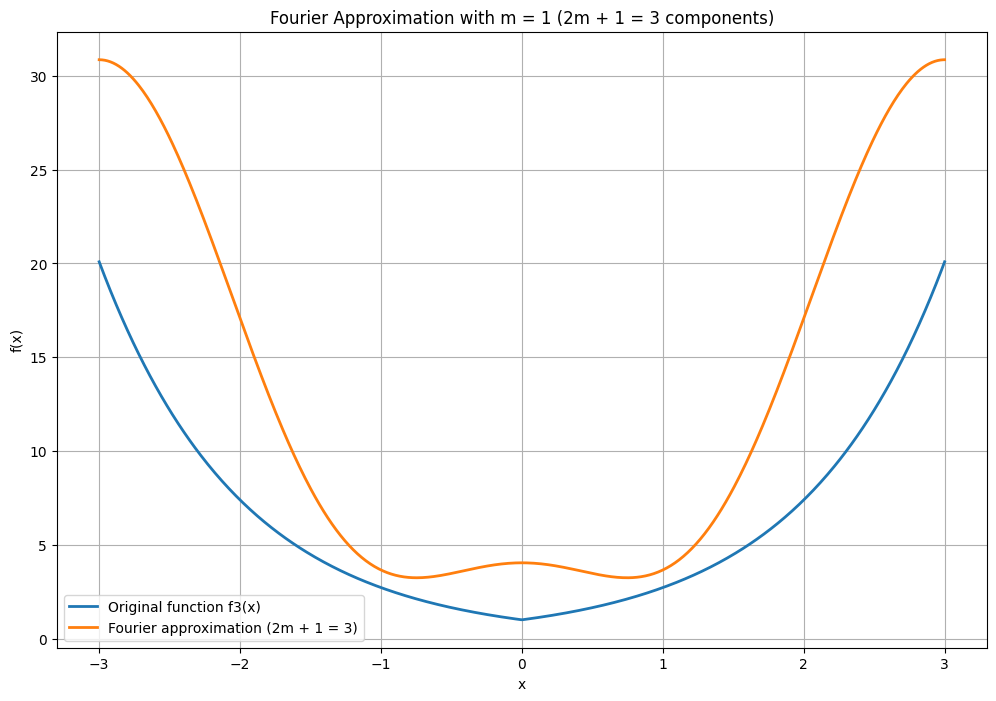

Optimal m_value for f3(x): 1


In [29]:
y_values_f3 = FA_numpy.f3(x_values)
m_value_f3 = FA_numpy.find_fourier_components_for_error_tolerance(x_values, y_values_f3, tolerance, 'f3(x)')
print("Optimal m_value for f3(x):", m_value_f3)

## Aufgabe 2: Fourier-Analyse von Sonnenfleckendaten

### (a) Power-Spektrum und Periodizität
Plotten Sie das Power-Spektrum und finden Sie die dominante Periodizität der Schwingung. Damit erhalten Sie eine Abschätzung auf die Dauer des Sonnenzyklus.

In [30]:
from FA import Fourier_Approximation_sunspots as FA_sunspots

In [31]:
# Load the data from the file
file_path = 'Data/sunspots.txt'
data = pd.read_csv(file_path, sep='\s+', header=None)

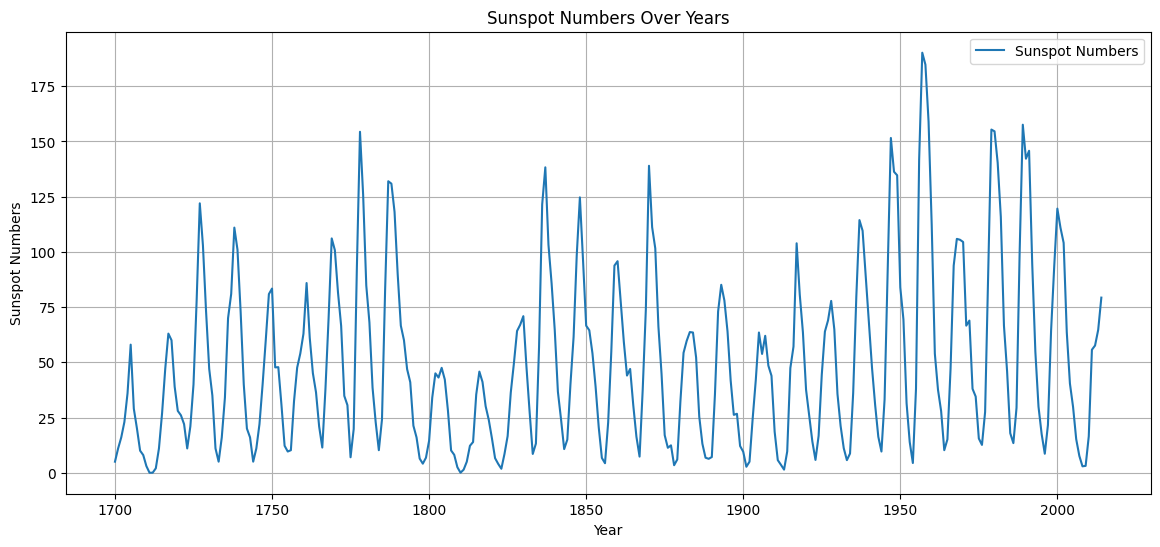

In [32]:
years = data.values[:, 0::2].flatten()
sunspot_numbers = data.values[:, 1::2].flatten()
FA_sunspots.show_sunspot_numbers_years(years, sunspot_numbers)

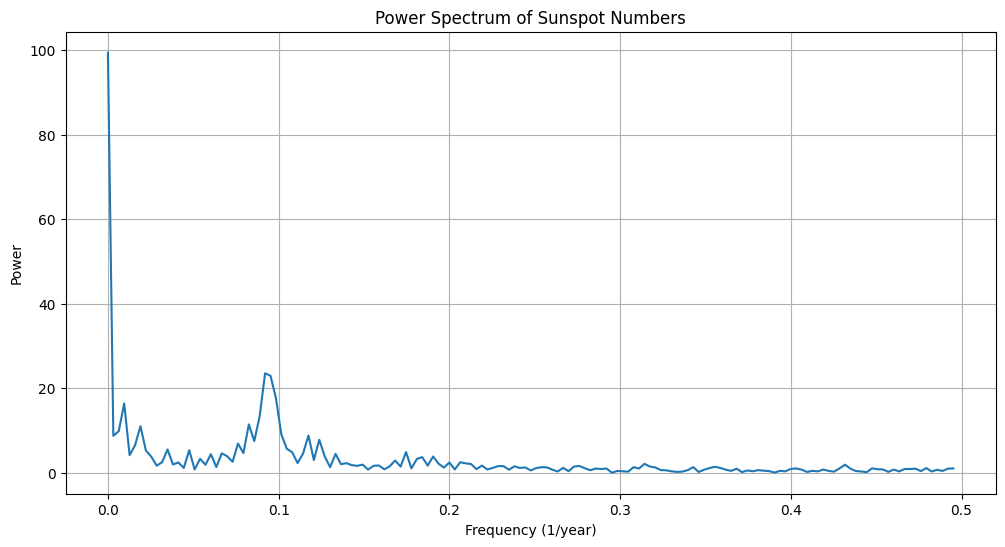

The dominant period of the sunspot cycle is approximately 10.86 years.


In [33]:
xf, power_spectrum, dominant_period_nonzero, yf = FA_sunspots.analyze_sunspot_data(years, sunspot_numbers)
FA_sunspots.show_sunspot_power_spectrum(xf, power_spectrum)
print(f"The dominant period of the sunspot cycle is approximately {dominant_period_nonzero:.2f} years.")

### (b) Weitere Perioden in den Sonnenfleck-Daten
Können Sie weitere Perioden in den Sonnenfleck-Daten mithilfe des Fourier-Spektrums finden?

In [34]:
FA_sunspots.calculate_dominant_periods(sunspot_numbers, 10)

Dominant period 1: 10.86 years
Dominant period 2: 10.50 years
Dominant period 3: 10.16 years
Dominant period 4: 105.00 years
Dominant period 5: 11.25 years
Dominant period 6: 12.12 years
Dominant period 7: 52.50 years
Dominant period 8: 157.50 years
Dominant period 9: 9.84 years
Dominant period 10: 8.51 years


### (c) Komponenten entfernen und Rücktransformation
Entfernen Sie einige Komponenten im Fourier-Spektrum und führen dann eine Rücktransformation durch:
- Größten Komponenten entfernen (k > 20)
- Kleinsten Komponenten entfernen (k < 5)
Beschreiben und erklären Sie die Ergebnisse.

In [35]:
k_greater_than = 20
k_less_than = 5
reconstructed_signal, yf_mod = FA_sunspots.modify_spectrum_and_reconstruct(yf, k_greater_than, k_less_than)

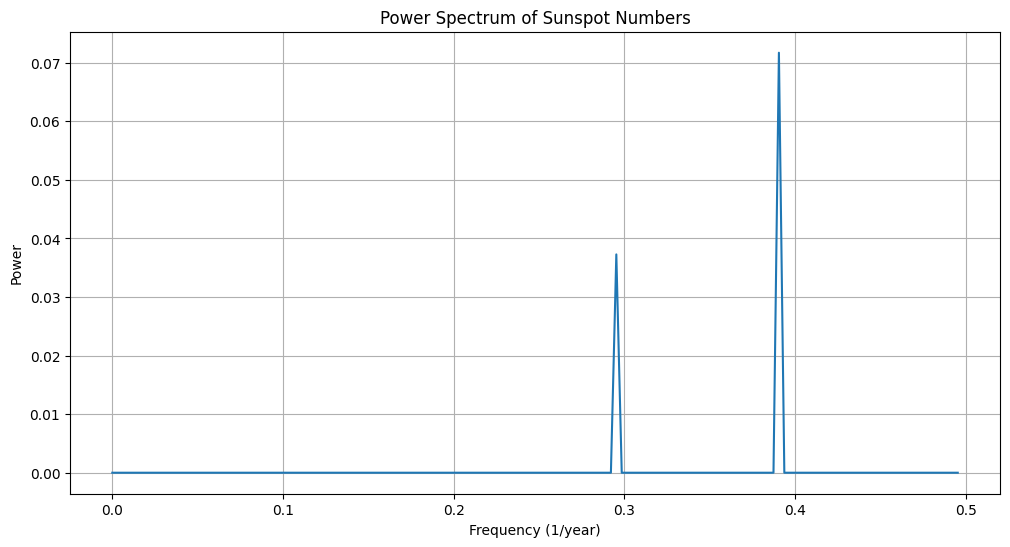

In [36]:
power_spectrum, xf, yf = FA_sunspots.calculate_power_spectrum(sunspot_numbers, yf_mod)
FA_sunspots.show_sunspot_power_spectrum(xf, power_spectrum)

### (d) Vergleich der Ergebnisse
Vergleichen Sie die Ergebnisse mit denen aus Aufgabe 1. Beschreiben und erklären Sie Unterschiede in den Fourier-Koeffizienten.

## Aufgabe 3: Analyse eines Musikstücks

### (a) Wellenform und Amplitudenspektrum
Plotten Sie die Wellenform des Klangs (waveplot) - einmal vollständig und einmal für einen kleinen Zeitbereich, sodass die Wellenform deutlich wird - sowie das Amplitudenspektrum. Wieso ist das Amplitudenspektrum symmetrisch bezüglich des Vorzeichens?

In [37]:
from FA import Fourier_Approximation_music as FA_music

In [38]:
filename = 'Data/music.wav'
y, sr = FA_music.load_audio(filename)

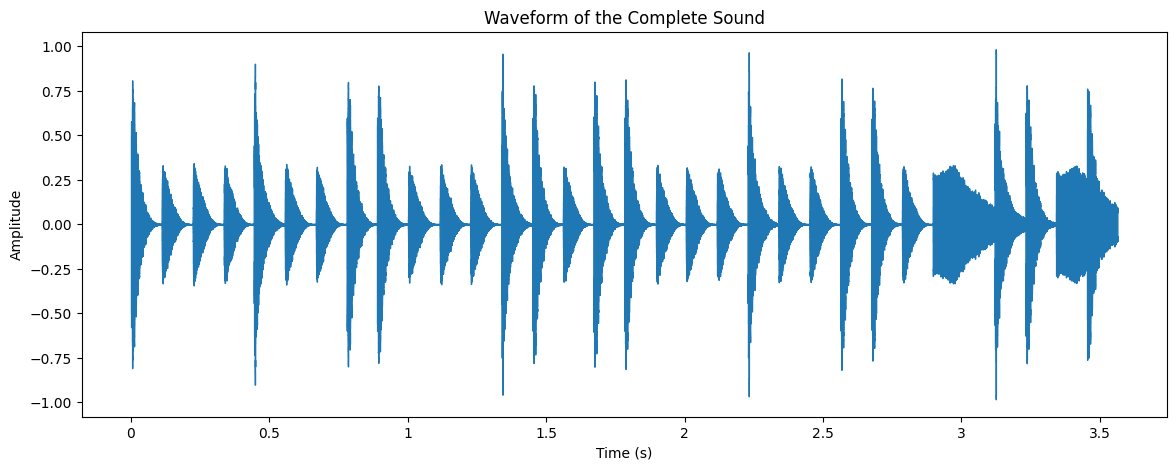

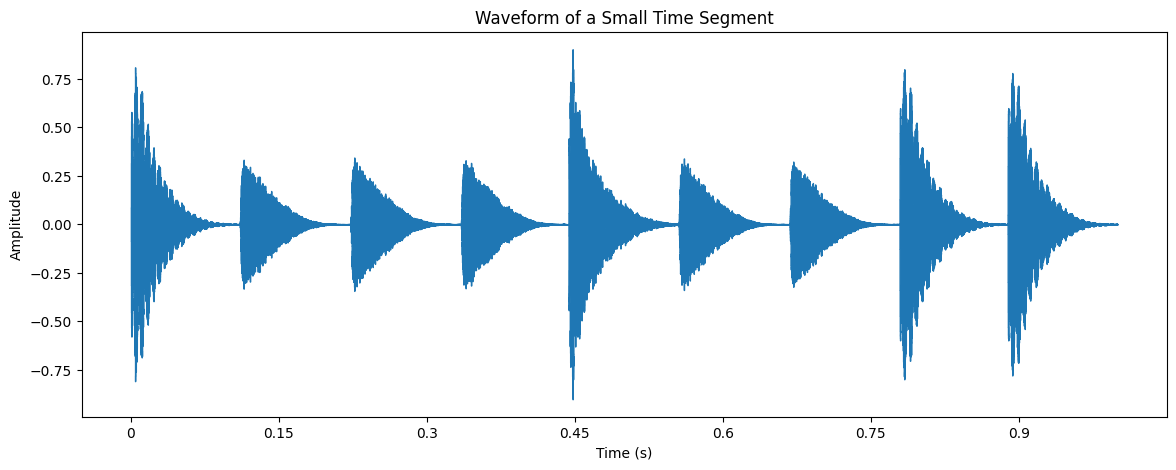

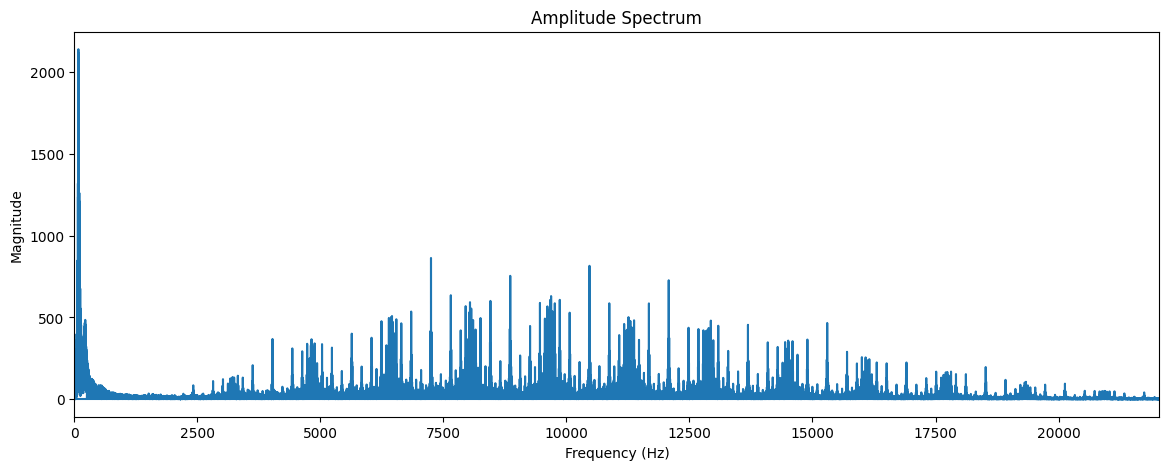

In [39]:
FA_music.plot_waveform(y, sr, 'Waveform of the Complete Sound')
FA_music.plot_waveform(y, sr, 'Waveform of a Small Time Segment', end=sr)

Y, Y_mag, freq = FA_music.compute_amplitude_spectrum(y, sr)
FA_music.plot_amplitude_spectrum(freq, Y_mag, sr)

### (b) Trennung des Sound-Signals
Trennen Sie das Sound-Signal in einen Teil oberhalb und unterhalb von 2 kHz in Frequenzen. Identifizieren Sie jeweils die Top 5 Frequenzen in diesen Frequenzbereichen.

In [40]:
cutoff = 2000  # 2 kHz
Y_high, Y_low = FA_music.split_signal(Y, freq, cutoff)

top5_high = FA_music.identify_top_frequencies(Y_high, freq)
top5_low = FA_music.identify_top_frequencies(Y_low, freq)

print("Top 5 frequencies above 2 kHz:", top5_high)
print("Top 5 frequencies below 2 kHz:", top5_low)

Top 5 frequencies above 2 kHz: [ -8857.42971121 -10467.69292436  10467.69292436   7246.88591552
  -7246.88591552]
Top 5 frequencies below 2 kHz: [ 89.7864137   81.9301025  -81.9301025  -80.80777233  80.80777233]


### (c) Rekonstruktion der gefilterten Signale
Berechnen Sie aus diesen beiden Teilen jeweils eine Rekonstruktion. Berechnen Sie den Fehler der Rekonstruktion wie in Aufgabe 1 für die gefilterten Signale und schreiben Sie die gefilterten rekonstruierten Daten in eine wav-Datei. Beschreiben und erklären Sie das Ergebnis.

In [41]:
y_high = FA_music.reconstruct_signal(Y_high)
y_low = FA_music.reconstruct_signal(Y_low)

mse_high = FA_music.calculate_mse(y, y_high)
mse_low = FA_music.calculate_mse(y, y_low)

print("MSE of the reconstruction for high frequencies:", mse_high)
print("MSE of the reconstruction for low frequencies:", mse_low)

MSE of the reconstruction for high frequencies: 0.008213506136915683
MSE of the reconstruction for low frequencies: 0.006674357406401238


In [42]:
output_directory = 'Data'
FA_music.save_audio(output_directory, 'music_high.wav', y_high, sr)
FA_music.save_audio(output_directory, 'music_low.wav', y_low, sr)

File saved: Data\music_high.wav
File saved: Data\music_low.wav


## Aufgabe 4: Analyse einer Bilddatei

### (a) 2D-Verteilung der Fourier-Komponenten
Plotten Sie die 2D-Verteilung der absoluten Werte der Fourier-Komponenten, sodass die kleinsten k-Werte in der Mitte liegen. Erklären Sie die Natur der Verteilung.

### (b) Entfernen der Fourier-Komponenten
Entfernen Sie je die Fourier-Komponenten mit absoluter Amplitude unter dem Schwellenwert 0.001%, 0.01%, 0.1%, 1% und 10% der maximalen Amplitude. Führen Sie eine inverse Fourier-Transformation durch und stellen Sie die gefilterten Fourierkomponenten sowie die resultierenden Bilder dar. Beschreiben und erklären Sie die Unterschiede.

### (c) Fehlerberechnung und Kompression
Berechnen Sie den Fehler (Aufgabe 1) zwischen rekonstruiertem und Originalbild. Wie weit können die Daten komprimiert werden, ohne einen Fehler von höchstens 1% zu überschreiten?